# Homework 2 - Berkeley STAT 157

Handout 1/29/2019, due 2/5/2019 by 4pm in Git by committing to your repository.

In [2]:
import numpy as np
import torch
from matplotlib import pyplot as plt

# 1. Multinomial Sampling

Implement a sampler from a discrete distribution from scratch, mimicking the function `mxnet.ndarray.random.multinomial`. Its arguments should be a vector of probabilities $p$. You can assume that the probabilities are normalized, i.e. tha they sum up to $1$. Make the call signature as follows:

```
samples = sampler(probs, shape) 

probs   : An ndarray vector of size n of nonnegative numbers summing up to 1
shape   : A list of dimensions for the output
samples : Samples from probs with shape matching shape
```

Hints:

1. Use `mxnet.ndarray.random.uniform` to get a sample from $U[0,1]$.
1. You can simplify things for `probs` by computing the cumulative sum over `probs`.

In [3]:
import numpy as np
import torch
def sampler(probs, shape):
    ## Add your codes here
    size=np.prod(shape)
    cum_probs=np.cumsum(probs)
    samples=torch.tensor([np.argmax(np.random.uniform(0,1) < cum_probs) for i in range(size)])
    return samples.reshape(shape)

# a simple test
sampler(torch.tensor([0.2, 0.3, 0.5]), (2,3))

tensor([[2, 1, 1],
        [2, 2, 1]])

In [6]:
probs=[0.2, 0.3, 0.5]
shape=(2,3)

size=np.prod(shape)
cum_probs=np.cumsum(probs)
torch.tensor([np.argmax(np.random.uniform(0,1) < cum_probs) for i in range(size)]).reshape(shape)


tensor([[2, 2, 2],
        [0, 0, 2]])

# 2. Central Limit Theorem

Let's explore the Central Limit Theorem when applied to text processing. 

* Download [https://www.gutenberg.org/ebooks/84](https://www.gutenberg.org/files/84/84-0.txt) from Project Gutenberg 
* Remove punctuation, uppercase / lowercase, and split the text up into individual tokens (words).
* For the words `a`, `and`, `the`, `i`, `is` compute their respective counts as the book progresses, i.e. 
    $$n_\mathrm{the}[i] = \sum_{j = 1}^i \{w_j = \mathrm{the}\}$$
* Plot the proportions $n_\mathrm{word}[i] / i$ over the document in one plot.
* Find an envelope of the shape $O(1/\sqrt{i})$ for each of these five words. (Hint, check the last page of the [sampling notebook](http://courses.d2l.ai/berkeley-stat-157/slides/1_24/sampling.pdf))
* Why can we **not** apply the Central Limit Theorem directly? 
* How would we have to change the text for it to apply? 
* Why does it still work quite well?

In [7]:
import urllib.request
with urllib.request.urlopen('https://www.gutenberg.org/files/84/84-0.txt') as f:
  book=f.read().decode('utf-8')

In [8]:
book=book.lower()
import re

# book=re.sub(r'\d+|_',' ',book)
tokens=re.findall(r'\w+',book)
tokens[0:300]

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'frankenstein',
 'by',
 'mary',
 'wollstonecraft',
 'godwin',
 'shelley',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'in',
 'the',
 'united',
 'states',
 'and',
 'most',
 'other',
 'parts',
 'of',
 'the',
 'world',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 'you',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 're',
 'use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'project',
 'gutenberg',
 'license',
 'included',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'www',
 'gutenberg',
 'org',
 'if',
 'you',
 'are',
 'not',
 'located',
 'in',
 'the',
 'united',
 'states',
 'you',
 'will',
 'have',
 'to',
 'check',
 'the',
 'laws',
 'of',
 'the',
 'country',
 'where',
 'you',
 'are',
 'located',
 'before',
 'using',
 'this',
 'ebook',
 'title',
 'frankenstein',
 'or',
 'the',
 'modern',
 'prometheus',
 'author',
 'mary',
 'wollst

In [9]:
words=["a","and","the","i","is"]
count=np.zeros((len(words),len(tokens)))
for j in range(len(tokens)):
  for i in range(len(words)):
    count[i][j]=1.0*(words[i]==tokens[j])
for i in range(len(words)):
  count[i]=np.cumsum(count[i])
x=np.arange(1,len(tokens)+1)
propotions=count/x

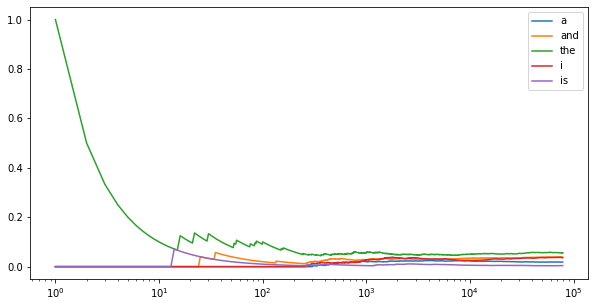

In [10]:
plt.figure(figsize=(10,5))
for i in range(len(words)):
  plt.semilogx(x,propotions[i],label=words[i])
plt.legend()
plt.show()

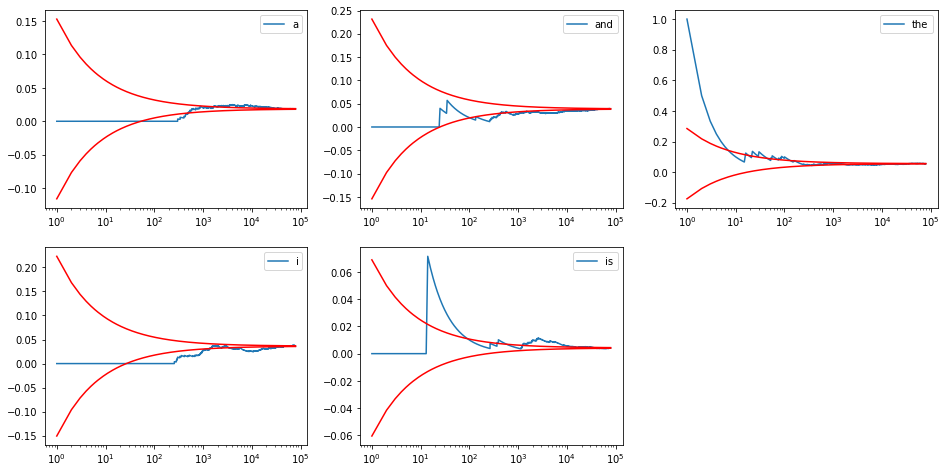

In [11]:
fig=plt.figure(figsize=(16,8))
for i in range(len(words)):
  p=propotions[i][-1]
  up=((p*(1-p))**0.5)*x**(-0.5)+p
  low=-((p*(1-p))**0.5)*x**(-0.5)+p
  fig.add_subplot(2,3,i+1)
  plt.semilogx(x,propotions[i],label=words[i])
  plt.semilogx(x,up,'r')
  plt.semilogx(x,low,'r')
  plt.legend()

## 3. Denominator-layout notation

We used the numerator-layout notation for matrix calculus in class, now let's examine the denominator-layout notation.

Given $x, y\in\mathbb R$, $\mathbf x\in\mathbb R^n$ and $\mathbf y \in \mathbb R^m$, we have

$$
\frac{\partial y}{\partial \mathbf{x}}=\begin{bmatrix}
\frac{\partial y}{\partial x_1}\\
\frac{\partial y}{\partial x_2}\\
\vdots\\
\frac{\partial y}{\partial x_n}
\end{bmatrix},\quad 
\frac{\partial \mathbf y}{\partial {x}}=\begin{bmatrix}
\frac{\partial y_1}{\partial x}, 
\frac{\partial y_2}{\partial x}, 
\ldots,
\frac{\partial y_m}{\partial x}
\end{bmatrix}
$$

and 

$$
\frac{\partial \mathbf y}{\partial \mathbf{x}}
=\begin{bmatrix}
\frac{\partial \mathbf y}{\partial {x_1}}\\
\frac{\partial \mathbf y}{\partial {x_2}}\\
\vdots\\
\frac{\partial \mathbf y}{\partial {x_3}}\\
\end{bmatrix}
=\begin{bmatrix}
\frac{\partial y_1}{\partial x_1}, 
\frac{\partial y_2}{\partial x_1},
\ldots,
\frac{\partial y_m}{\partial x_1}
\\ 
\frac{\partial y_1}{\partial x_2},
\frac{\partial y_2}{\partial x_2},
\ldots,
\frac{\partial y_m}{\partial x_2}\\ 
\vdots\\
\frac{\partial y_1}{\partial x_n},
\frac{\partial y_2}{\partial x_n},
\ldots,
\frac{\partial y_m}{\partial x_n}
\end{bmatrix}
$$

Questions: 

1. Assume $\mathbf  y = f(\mathbf u)$ and $\mathbf u = g(\mathbf x)$, write down the chain rule for $\frac {\partial\mathbf  y}{\partial\mathbf x}$
2. Given $\mathbf X \in \mathbb R^{m\times n},\ \mathbf w \in \mathbb R^n, \ \mathbf y \in \mathbb R^m$, assume $z = \| \mathbf X \mathbf w - \mathbf y\|^2$, compute $\frac{\partial z}{\partial\mathbf w}$.

## 4. Numerical Precision

Given scalars `x` and `y`, implement the following `log_exp` function such that it returns 
$$-\log\left(\frac{e^x}{e^x+e^y}\right)$$.

In [19]:
def log_exp(x, y):
    ## add your solution here
    return -torch.log(torch.exp(x)/(torch.exp(x)+torch.exp(y)))

Test your codes with normal inputs:

In [26]:
x, y = torch.tensor([2.0]), torch.tensor([3.0])
z = log_exp(x, y)
z

tensor([1.3133])

Now implement a function to compute $\partial z/\partial x$ and $\partial z/\partial y$ with `autograd`

In [27]:
def grad(forward_func, x, y): 
    ## Add your codes here
    x.requires_grad_(True)
    y.requires_grad_(True)
    z=forward_func(x,y)
    z.backward
    print('x.grad =', x.grad)
    print('y.grad =', y.grad)

Test your codes, it should print the results nicely. 

In [ ]:
grad(log_exp, x, y)

But now let's try some "hard" inputs

In [ ]:
x, y = torch.tensor([50.0]), torch.tensor([100.0])
grad(log_exp, x, y)

Does your code return correct results? If not, try to understand the reason. (Hint, evaluate `exp(100)`). Now develop a new function `stable_log_exp` that is identical to `log_exp` in math, but returns a more numerical stable result.

In [25]:
torch.exp(torch.tensor([100.0]))

tensor([inf])

In [ ]:
x, y = torch.tensor([50.0]), torch.tensor([100.0])
def stable_log_exp(x,y):
  z=torch.max(x,y)
  return -x+z+torch.log(torch.exp(x-z)+torch.exp(y-z))

grad(stable_log_exp,x,y)